In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from quantum_states import QuantumState

In [9]:
a = np.array([np.sqrt(1/8) for i in range(0, 8)])
ket_zero = np.array([1, 0])
ket_one = np.array([0, 1])
combined = np.kron(ket_zero, ket_one)
hadamard_matrix =np.sqrt(1/4) * np.array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1, -1,  1]])
qc = QuantumState(a)
# qc = qc.apply_gate(hadamard_matrix)

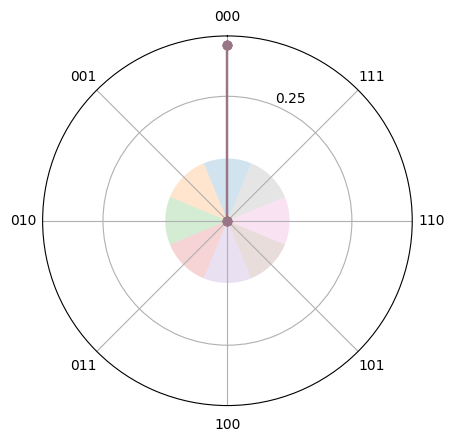

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.set_rmax(1)
ax.set_rmin(0)
ax.set_rticks([0.25, .5, 0.75, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line


ax.set_theta_offset(np.pi/2)

# ax.set_title("A line plot on a polar axis", va='bottom')

def prepare_plot_and_ax(plt, ax):
    drawing_data = qc.drawing_data()
    qubit_count = np.log2(len(drawing_data))
    number_of_base_states = len(drawing_data)
    ticks = [(i/number_of_base_states) * 2 * np.pi for i in range(0, number_of_base_states)]
    bit_format = '{' + f"0:0{int(qubit_count)}b" + '}'

    bits = [bit_format.format(i) for i in range(0, number_of_base_states)]
    ax.set_xticks(ticks, bits)
    for (vector,  (theta_fill, theta_length)) in drawing_data:
        plt.polar(vector[0],vector[1], marker='o', alpha=0.5)
        ax.fill_between(theta_fill, 0, theta_length, alpha = 0.2)
    
prepare_plot_and_ax(plt, ax)
plt.show()